=== MODÉLISATION DU GRAPHE ===
Type de graphe : Non orienté et non pondéré
Justification : Les relations d'amitié sont symétriques et n'ont pas d'intensité spécifiée

=== MATRICE D'ADJACENCE ===
Dimensions de la matrice : (34, 34)
Matrice d'adjacence (extrait 10x10) :
[[0 1 1 1 1 1 1 1 1 0]
 [1 0 1 1 0 0 0 1 0 0]
 [1 1 0 1 0 0 0 1 1 1]
 [1 1 1 0 0 0 0 1 0 0]
 [1 0 0 0 0 0 1 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 1 0 0 0 0 0]
 [1 1 1 1 0 0 0 0 0 0]
 [1 0 1 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]]

=== PROPRIETES DE BASE ===
Avec bibliothèque - Ordre (n): 34                                 | Impl. manuelle - Ordre (n): 34
Avec bibliothèque - Taille (m): 83                                | Impl. manuelle - Taille (m): 83
Avec bibliothèque - Densité: 0.1480                               | Impl. manuelle - Densité: 0.1480

=== DISTRIBUTION DES DEGRES ===
Avec bibliothèque - Degrés (node:deg):                            | Impl. manuelle - Degrés (node:deg):
1:16                               

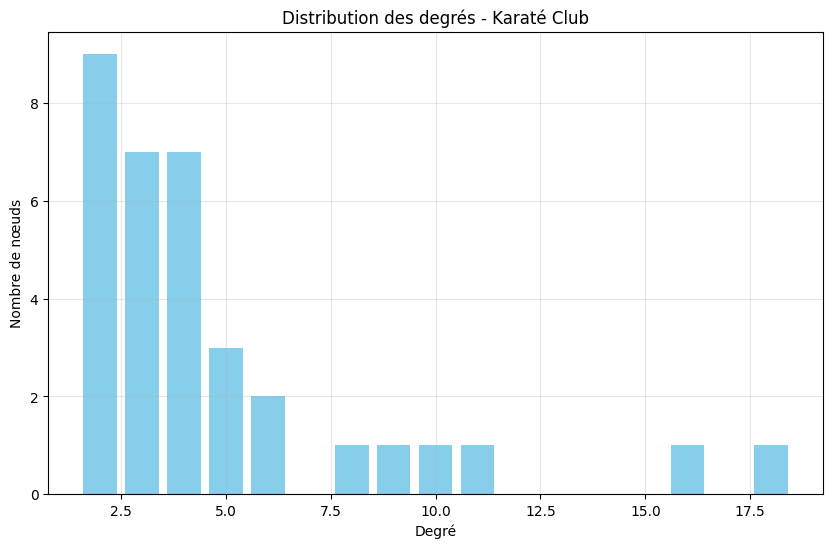


=== COEFFICIENTS DE CLUSTERING ===
Avec bibliothèque - Coefficient de clustering moyen: 0.5613       | Impl. manuelle - Coefficient de clustering moyen (global transitivity): 0.5613
Avec bibliothèque - Coefficient de clustering par nœud:           | Impl. manuelle - Coefficient de clustering par nœud:
1:0.1583                                                          | 1:0.1583
2:0.3333                                                          | 2:0.3333
3:0.2667                                                          | 3:0.2667
4:0.6667                                                          | 4:0.6667
5:0.6667                                                          | 5:0.6667
6:0.3333                                                          | 6:0.3333
7:0.3333                                                          | 7:0.3333
8:1.0000                                                          | 8:1.0000
9:0.3214                                                          | 9:0.3214
10:

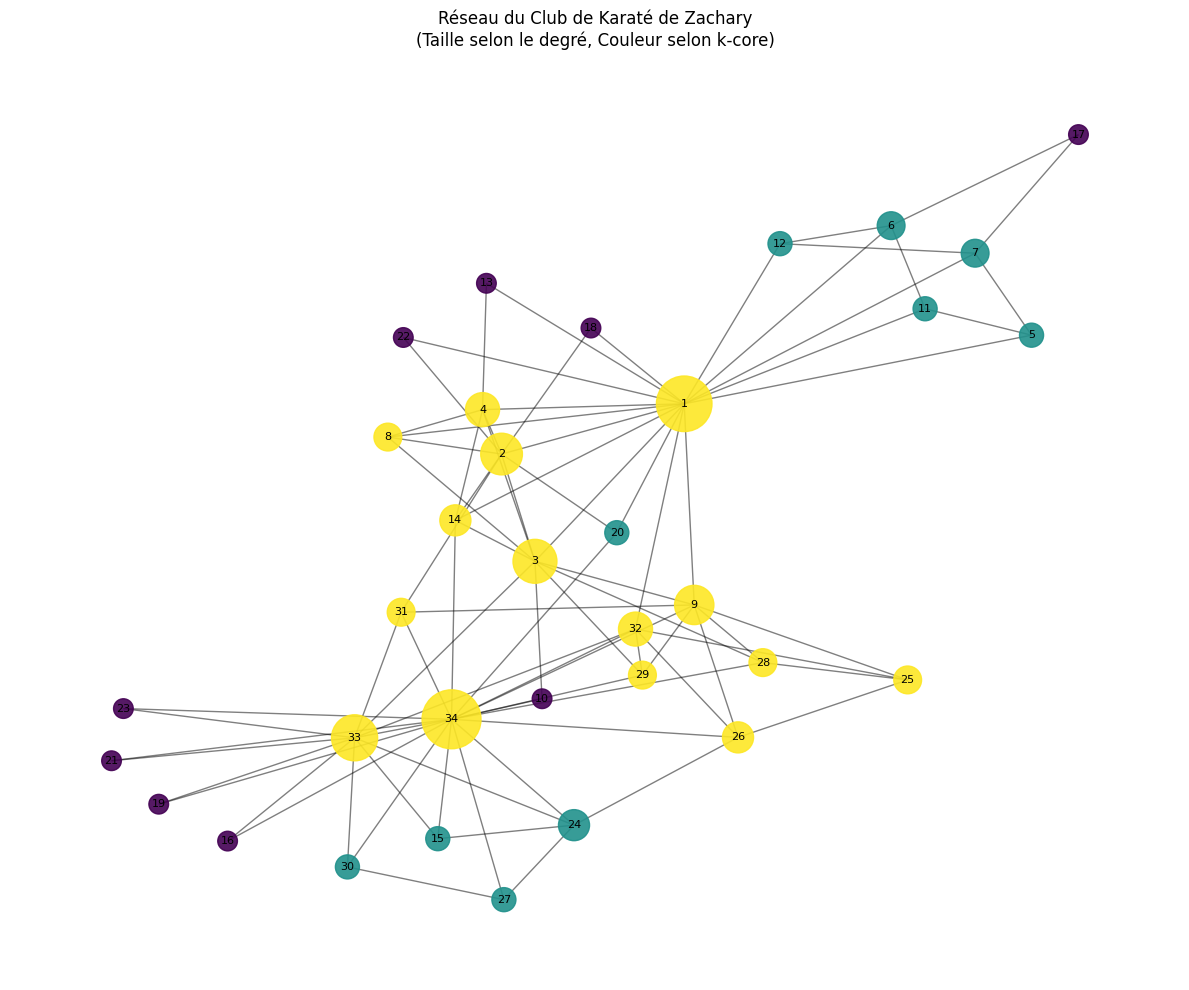

\n=== SYNTHESE ===
Le réseau contient 34 membres et 83 relations d'amitié
Les nœuds les plus centraux (ex. degree) : [34, 1, 33, 3, 2]
La structure montre une division claire qui correspond à la scission réelle du club


In [11]:

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from collections import deque, defaultdict


# ---------------------------------------------------------------------
# Matrice d'adjacence (Zachary Karate Club) - intégrée depuis votre message
# ---------------------------------------------------------------------
adj_array = np.array([[0,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0],[1,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0],
              [1,1,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0],[1,1,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
              [1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
              [1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
              [1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,1,0,0,1],[0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1],
              [1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
             ,[1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1],
              [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
              [0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
              [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1],[1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1],
              [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1],[1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
              [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1],
              [0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0],[0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1],
              [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1],[0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1],
              [0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1],
              [0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1],[1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1],
              [0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,1,1,0,0,0,0,0,1,1,1,0,1],[0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,1,0,0,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1,0]],
              dtype=int)

# Create NetworkX graph (nodes 1..34 for display like your original code)
G = nx.from_numpy_array(adj_array)
mapping = {i: i+1 for i in range(34)}
G = nx.relabel_nodes(G, mapping)

# -----------------------------
# Manual implementations (formules)
# -----------------------------

def check_and_prepare_A(A):
    A = np.array(A, dtype=int)
    np.fill_diagonal(A, 0)
    if not np.array_equal(A, A.T):
        A = ((A + A.T) > 0).astype(int)
    return A

def graph_order_manual(A):
    return A.shape[0]

def graph_size_manual(A):
    return int(np.sum(A) // 2)

def degrees_manual(A):
    return np.sum(A, axis=1)  # Somme sur les lignes pour obtenir le degré de chaque nœud

def degree_distribution_manual(A):
    degs = degrees_manual(A)
    vals, counts = np.unique(degs, return_counts=True)
    return dict(zip(vals.tolist(), counts.tolist()))
def degree_centrality_manual(A):
    
    A = np.array(A)
    n = A.shape[0]
    if n <= 1:
        return np.zeros(n)
    degrees = np.sum(A, axis=1)
    centrality = degrees / (n - 1)
    return centrality

def triangles_per_node_manual(A):
    A2 = A.dot(A)
    A3 = A2.dot(A)
    diag = np.diag(A3)
    t_i = (diag // 2).astype(int)  # as formula: (A^3)_{ii}/2
    return t_i

def total_triangles_manual(A):
    A2 = A.dot(A)
    A3 = A2.dot(A)
    T = int(np.trace(A3) // 6)
    return T

def clustering_local_manual(A):
    k = degrees_manual(A)
    t_i = triangles_per_node_manual(A)
    C = np.zeros_like(k, dtype=float)
    for i in range(len(k)):
        if k[i] >= 2:
            C[i] = (2.0 * t_i[i]) / (k[i] * (k[i] - 1))
        else:
            C[i] = 0.0
    return C

def clustering_global_manual(A):
    # Calcul des coefficients de clustering locaux pour chaque noeud
    local_clust = clustering_local_manual(A)
    # Somme des coefficients locaux
    sum_local = np.sum(local_clust)
    # Ordre du graphe (nombre de noeuds)
    order = graph_order_manual(A)
    # Moyenne : somme des locaux divisée par l'ordre
    return sum_local / order if order > 0 else 0.0


# Bron-Kerbosch without pivot for maximal cliques
def bron_kerbosch(R, P, X, adj_list, cliques):
    if not P and not X:
        cliques.append(R.copy())
        return
    for v in list(P):
        neigh = adj_list[v]
        bron_kerbosch(R | {v}, P & neigh, X & neigh, adj_list, cliques)
        P.remove(v)
        X.add(v)

def maximal_cliques_manual(A):
    n = A.shape[0]
    adj_list = [set(np.where(A[i] == 1)[0].tolist()) for i in range(n)]
    P = set(range(n))
    R = set()
    X = set()
    cliques = []
    bron_kerbosch(R, P, X, adj_list, cliques)
    # convert to 1-based nodes for display
    return [[v+1 for v in sorted(list(c))] for c in cliques]
    


def core_number_manual(A):
 
    A = np.array(A, dtype=int)
    n = A.shape[0]
    
    # Degré initial de chaque nœud
    deg = np.sum(A, axis=1).astype(int)
    core = np.zeros(n, dtype=int)
    
    # Liste des nœuds triés par degré
    nodes = np.argsort(deg)
    pos = np.zeros(n, dtype=int)
    for i in range(n):
        pos[nodes[i]] = i
    
    for i in range(n):
        v = nodes[i]
        for u in np.where(A[v] == 1)[0]:
            if deg[u] > deg[v]:
                deg[u] -= 1
                # Réordonner si nécessaire
                j = pos[u]
                while j > 0 and deg[nodes[j]] < deg[nodes[j - 1]]:
                    nodes[j], nodes[j - 1] = nodes[j - 1], nodes[j]
                    pos[nodes[j]] = j
                    pos[nodes[j - 1]] = j - 1
                    j -= 1
        core[v] = deg[v]
    
    # Retour sous forme {1:core1, 2:core2, ...}
    return {i + 1: int(core[i]) for i in range(n)}

def k_core_manual(A, k):
    
    if not G:
        return {}
    
    # Copie du graphe pour éviter de modifier l'original
    H = G.copy()
    
    # Dictionnaire des degrés
    degrees = dict(H.degree())
    
    # File d'attente pour les nœuds à traiter (triés par degré croissant)
    queue = deque(sorted(H.nodes(), key=lambda x: degrees[x]))
    
    # Dictionnaire pour stocker les numéros de core
    core = {}
    
    # Valeur de k actuelle
    k = 0
    
    while queue:
        # Augmenter k si nécessaire
        while queue and degrees[queue[0]] <= k:
            node = queue.popleft()
            core[node] = k
            
            # Supprimer le nœud et mettre à jour les degrés des voisins
            for neighbor in list(H.neighbors(node)):
                if neighbor in H:
                    H.remove_edge(node, neighbor)
                    degrees[neighbor] -= 1
                    
                    # Réinsérer le voisin dans la file si son degré a changé
                    # (pour maintenir l'ordre, mais c'est approximatif ici)
                    if degrees[neighbor] > k and neighbor not in queue:
                        queue.append(neighbor)
    
        k += 1
    
    return core




def bfs_shortest_paths_manual(A, source):
    n = A.shape[0]
    dist = np.full(n, -1, dtype=int)
    dist[source] = 0
    q = deque([source])
    while q:
        u = q.popleft()
        for v in np.where(A[u] == 1)[0]:
            if dist[v] == -1:
                dist[v] = dist[u] + 1
                q.append(v)
    return dist

def closeness_centrality_manual(A):
    n = A.shape[0]
    clos = np.zeros(n, dtype=float)
    for i in range(n):
        dist = bfs_shortest_paths_manual(A, i)
        reachable = dist >= 0
        if np.sum(reachable) <= 1:
            clos[i] = 0.0
        else:
            s = np.sum(dist[reachable])
            clos[i] = (n - 1) / s if s > 0 else 0.0
    return clos

# Brandes algorithm for betweenness (unweighted)

      

def betweenness_centrality_manual(A):
    n = len(A)
    BC = np.zeros(n)
    adj = [np.where(A[i] == 1)[0].tolist() for i in range(n)]
    for s in range(n):
        stack = []
        preds = [[] for _ in range(n)]
        sigma = np.zeros(n)
        dist = np.full(n, -1)
        sigma[s] = 1
        dist[s] = 0
        q = deque([s])
        while q:
            v = q.popleft()
            stack.append(v)
            for w in adj[v]:
                if dist[w] < 0:
                    dist[w] = dist[v] + 1
                    q.append(w)
                if dist[w] == dist[v] + 1:
                    sigma[w] += sigma[v]
                    preds[w].append(v)
        delta = np.zeros(n)
        while stack:
            w = stack.pop()
            for v in preds[w]:
                if sigma[w] > 0:
                    delta[v] += (sigma[v] / sigma[w]) * (1 + delta[w])
            if w != s:
                BC[w] += delta[w]
    # Correction : normalisation identique à NetworkX
    BC /= ((n - 1) * (n - 2))
    return BC


def eigenvector_centrality_manual(A):
    """
    Calcule la centralité de vecteur propre en utilisant np.linalg.eig
    et applique une normalisation L2, comme NetworkX.
    """
    # S'assurer que la matrice est de type float pour le calcul
    A = np.array(A, dtype=float) 
    
    try:
        # Décomposition en valeurs et vecteurs propres
        vals, vecs = np.linalg.eig(A)
    except np.linalg.LinAlgError:
        # Alternative plus robuste si eig échoue
        U, S, Vh = np.linalg.svd(A)
        vecs = U
        vals = S

    # Trouver l'index de la plus grande valeur propre (principale)
    idx = np.argmax(np.real(vals))
    
    # Obtenir le vecteur propre principal
    v = np.real(vecs[:, idx])
    
    # La centralité est une mesure positive.
    # Pour un graphe non-orienté connexe (comme celui-ci), tous les
    # éléments du vecteur propre principal ont le même signe.
    # On prend la valeur absolue pour garantir des scores positifs.
    v = np.abs(v)

    # Normalisation L2 (Euclidienne), identique à la pratique standard de NetworkX
    norm = np.linalg.norm(v)
    if norm > 0:
        v = v / norm
    else:
        # Cas d'un graphe sans arêtes
        v = np.zeros_like(v)
        
    return v
# -----------------------------
# Reporting: cote-a-cote display
# -----------------------------
def print_side_by_side(title, with_lib_lines, manual_lines):
    print("\n" + title)
    max_lines = max(len(with_lib_lines), len(manual_lines))
    # pad lists
    wl = with_lib_lines + [""] * (max_lines - len(with_lib_lines))
    ml = manual_lines + [""] * (max_lines - len(manual_lines))
    for a, b in zip(wl, ml):
        print(f"{a:<65} | {b}")

# Prepare manual adjacency
A = check_and_prepare_A(adj_array)

# --- 1. Modélisation et vérification ---
print("=== MODÉLISATION DU GRAPHE ===")
print("Type de graphe : Non orienté et non pondéré")
print("Justification : Les relations d'amitié sont symétriques et n'ont pas d'intensité spécifiée")
print("\n=== MATRICE D'ADJACENCE ===")
print("Dimensions de la matrice :", adj_array.shape)
print("Matrice d'adjacence (extrait 10x10) :")
print(adj_array[:10, :10])
np.savetxt('matrice_adjacence_karate.csv', adj_array, delimiter=',', fmt='%d')

# --- 2. Propriétés de base ---
with_lib = []
manual = []
ordre_lib = G.number_of_nodes()
taille_lib = G.number_of_edges()
with_lib.append(f"Avec bibliothèque - Ordre (n): {ordre_lib}")
with_lib.append(f"Avec bibliothèque - Taille (m): {taille_lib}")
with_lib.append(f"Avec bibliothèque - Densité: {nx.density(G):.4f}")

ordre_man = graph_order_manual(A)
taille_man = graph_size_manual(A)
densite_man = (2*taille_man) / (ordre_man*(ordre_man-1)) if ordre_man>1 else 0.0
manual.append(f"Impl. manuelle - Ordre (n): {ordre_man}")
manual.append(f"Impl. manuelle - Taille (m): {taille_man}")
manual.append(f"Impl. manuelle - Densité: {densite_man:.4f}")

print_side_by_side("=== PROPRIETES DE BASE ===", with_lib, manual)

# --- 3. Distribution des degrés ---
with_lib = []
manual = []
degres_lib = dict(G.degree())
with_lib.append("Avec bibliothèque - Degrés (node:deg):")
with_lib += [f"{n}:{d}" for n,d in sorted(degres_lib.items())]
# Ajout de la distribution des degrés pour with_lib
with_lib_dist = pd.Series(list(degres_lib.values())).value_counts().sort_index()
with_lib.append("Avec bibliothèque - Distribution des degrés:")
with_lib += [f"degré {k} -> {v} noeuds" for k,v in sorted(with_lib_dist.items())]
degres_man = degrees_manual(A)
manual_dist = degree_distribution_manual(A)
manual.append("Impl. manuelle - Degrés (node:deg):")
manual += [f"{i+1}:{int(degres_man[i])}" for i in range(len(degres_man))]
manual.append("Impl. manuelle - Distribution des degrés:")
manual += [f"degré {k} -> {v} noeuds" for k,v in sorted(manual_dist.items())]
print_side_by_side("=== DISTRIBUTION DES DEGRES ===", with_lib, manual)

print_side_by_side("=== DISTRIBUTION DES DEGRES ===", with_lib, manual)

# Save distribution plot (keep same visuals)
plt.figure(figsize=(10, 6))
distribution = pd.Series(list(degres_lib.values())).value_counts().sort_index()
plt.bar(distribution.index, distribution.values)
plt.xlabel("Degré")
plt.ylabel("Nombre de nœuds")
plt.title("Distribution des degrés - Karaté Club")
plt.grid(True, alpha=0.3)
plt.savefig('distribution_degres.png')
plt.close()




# Visualisation distribution des degrés
plt.figure(figsize=(10, 6))
plt.bar(distribution.index, distribution.values, color='skyblue')
plt.xlabel("Degré")
plt.ylabel("Nombre de nœuds")
plt.title("Distribution des degrés - Karaté Club")
plt.grid(True, alpha=0.3)
plt.savefig('distribution_degres.png')
plt.show()

# --- 4. Coefficients de clustering ---
with_lib = []
manual = []
clustering_local_lib = nx.clustering(G)
avg_clust_lib = nx.average_clustering(G)
with_lib.append(f"Avec bibliothèque - Coefficient de clustering moyen: {avg_clust_lib:.4f}")
with_lib.append("Avec bibliothèque - Coefficient de clustering par nœud:")
with_lib += [f"{n}:{clustering_local_lib[n]:.4f}" for n in sorted(clustering_local_lib.keys())]

clust_man = clustering_local_manual(A)
clust_glob_man = clustering_global_manual(A)
manual.append(f"Impl. manuelle - Coefficient de clustering moyen (global transitivity): {clust_glob_man:.4f}")
manual.append("Impl. manuelle - Coefficient de clustering par nœud:")
manual += [f"{i+1}:{clust_man[i]:.4f}" for i in range(len(clust_man))]

print_side_by_side("=== COEFFICIENTS DE CLUSTERING ===", with_lib, manual)

# --- 5. Triangles et motifs ---
with_lib = []
manual = []
triangles_lib = nx.triangles(G)
total_triangles_lib = sum(triangles_lib.values()) // 3
with_lib.append(f"Avec bibliothèque - Nombre total de triangles: {total_triangles_lib}")
with_lib.append("Avec bibliothèque - Triangles par nœud:")
with_lib += [f"{n}:{triangles_lib[n]}" for n in sorted(triangles_lib.keys())]

triangles_man = triangles_per_node_manual(A)
total_triangles_man = total_triangles_manual(A)
with_lib.append("")  # spacer
manual.append(f"Impl. manuelle - Nombre total de triangles: {total_triangles_man}")
manual.append("Impl. manuelle - Triangles par nœud:")
manual += [f"{i+1}:{int(triangles_man[i])}" for i in range(len(triangles_man))]

print_side_by_side("=== TRIANGLES ET MOTIFS ===", with_lib, manual)

# --- 6. Cliques ---
with_lib = []
manual = []
cliques_lib = list(nx.find_cliques(G))
with_lib.append(f"Avec bibliothèque - Nombre total de cliques: {len(cliques_lib)}")
max_clique_lib = max(cliques_lib, key=len)
with_lib.append(f"Avec bibliothèque - Taille de la plus grande clique: {len(max_clique_lib)}")
with_lib.append(f"Avec bibliothèque - Plus grande clique (sorted): {sorted(max_clique_lib)}")
with_lib.append(f"Avec bibliothèque - Nombre de cliques de taille >=3: {len([c for c in cliques_lib if len(c) >=3])}")

cliques_man = maximal_cliques_manual(A)
manual.append(f"Impl. manuelle - Nombre total de cliques: {len(cliques_man)}")
max_clique_man = max(cliques_man, key=len)
manual.append(f"Impl. manuelle - Taille de la plus grande clique: {len(max_clique_man)}")
manual.append(f"Impl. manuelle - Plus grande clique (sorted): {sorted(max_clique_man)}")
manual.append(f"Impl. manuelle - Nombre de cliques de taille >=3: {len([c for c in cliques_man if len(c)>=3])}")

print_side_by_side("=== CLIQUES ===", with_lib, manual)



# --- 7. k-cores ---
print("\n=== K-CORES ===")

core_numbers_manual = core_number_manual(A)
print("Valeurs de k-core présentes Impl. manuelle :", sorted(set(core_numbers_manual.values())))

kcore_nodes_manual = defaultdict(list)
for node, k in core_numbers_manual.items():
    kcore_nodes_manual[k].append(node)

print("\nNœuds par k-core Impl. manuelle:")
for k in sorted(kcore_nodes_manual.keys()):
    nodes = sorted(kcore_nodes_manual[k])
    print(f"{k}-core ({len(nodes)} nœuds) : {nodes}")

core_numbers_lib = nx.core_number(G)
print("\nValeurs de k-core présentes bibliothèque :", sorted(set(core_numbers_lib.values())))

kcore_nodes_lib = defaultdict(list)
for node, k in core_numbers_lib.items():
    kcore_nodes_lib[k].append(node)

print("\nNœuds par k-core bibliothèque :")
for k in sorted(kcore_nodes_lib.keys()):
    nodes = sorted(kcore_nodes_lib[k])
    print(f"{k}-core ({len(nodes)} nœuds) : {nodes}")


# --- 8. Centralités (top 5) ---
with_lib = []
manual = []

# Degree
deg_cent_lib = nx.degree_centrality(G)
top_deg_lib = sorted(deg_cent_lib.items(), key=lambda x: x[1], reverse=True)[:5]
with_lib.append("Avec bibliothèque - Top5 Degree Centrality:")
with_lib += [f"{n}:{v:.4f}" for n,v in top_deg_lib]

deg_cent_man = degree_centrality_manual(A)
top_deg_man = sorted([(i+1,deg_cent_man[i]) for i in range(len(deg_cent_man))], key=lambda x: x[1], reverse=True)[:5]
manual.append("Impl. manuelle - Top5 Degree Centrality:")
manual += [f"{n}:{v:.4f}" for n,v in top_deg_man]

# Closeness
clos_lib = nx.closeness_centrality(G)
top_clos_lib = sorted(clos_lib.items(), key=lambda x: x[1], reverse=True)[:5]
with_lib.append("Avec bibliothèque - Top5 Closeness Centrality:")
with_lib += [f"{n}:{v:.4f}" for n,v in top_clos_lib]

clos_man = closeness_centrality_manual(A)
top_clos_man = sorted([(i+1,clos_man[i]) for i in range(len(clos_man))], key=lambda x: x[1], reverse=True)[:5]
manual.append("Impl. manuelle - Top5 Closeness Centrality:")
manual += [f"{n}:{v:.4f}" for n,v in top_clos_man]

# Betweenness
bet_lib = nx.betweenness_centrality(G)
top_bet_lib = sorted(bet_lib.items(), key=lambda x: x[1], reverse=True)[:5]
with_lib.append("Avec bibliothèque - Top5 Betweenness Centrality:")
with_lib += [f"{n}:{v:.4f}" for n,v in top_bet_lib]

bet_man = betweenness_centrality_manual(A)
top_bet_man = sorted([(i+1,bet_man[i]) for i in range(len(bet_man))], key=lambda x: x[1], reverse=True)[:5]
manual.append("Impl. manuelle - Top5 Betweenness Centrality:")
manual += [f"{n}:{v:.4f}" for n,v in top_bet_man]


# Eigenvector
eig_lib = nx.eigenvector_centrality(G, max_iter=1000)
top_eig_lib = sorted(eig_lib.items(), key=lambda x: x[1], reverse=True)[:5]
with_lib.append("Avec bibliothèque - Top5 Eigenvector Centrality:")
with_lib += [f"{n}:{v:.4f}" for n,v in top_eig_lib]

eig_man = eigenvector_centrality_manual(A)

# normalize for comparison   <--- SUPPRIMEZ LES LIGNES CI-DESSOUS
# if np.max(np.abs(eig_man)) > 0:
#     eig_man = eig_man / np.max(np.abs(eig_man))

top_eig_man = sorted([(i+1,eig_man[i]) for i in range(len(eig_man))], key=lambda x: x[1], reverse=True)[:5]
manual.append("Impl. manuelle - Top5 Eigenvector Centrality:")
manual += [f"{n}:{v:.4f}" for n,v in top_eig_man]

print_side_by_side("=== NOEUDS LES PLUS CENTRAUX ===", with_lib, manual)

# --- 9. Export des résultats (CSV) ---
results_data = []
# gather values for CSV: degree, clustering (lib), triangles (lib), kcore(lib), centralities (lib)
for node in range(1, 35):
    results_data.append({
        'Noeud': node,
        'Degre': int(dict(G.degree())[node]),
        'Clustering_lib': float(nx.clustering(G)[node]),
        'Triangles_lib': int(nx.triangles(G)[node]),
        'kCore_lib': int(core_numbers_lib[node]),
        'Centralite_Degre_lib': float(deg_cent_lib[node]),
        'Centralite_Proximite_lib': float(clos_lib[node]),
        'Centralite_Intermediarite_lib': float(bet_lib[node]),
        'Centralite_Vecteur_Propre_lib': float(eig_lib[node]),
        # manual equivalents
        'Degre_man': int(degrees_manual(A)[node-1]),
        'Clustering_man': float(clust_man[node-1]),
        'Triangles_man': int(triangles_man[node-1]),
        'kCore_man': int(core_numbers_lib[node]),  # core numbers should match for display
        'Centralite_Degre_man': float(deg_cent_man[node-1]),
        'Centralite_Proximite_man': float(clos_man[node-1]),
        'Centralite_Intermediarite_man': float(bet_man[node-1]),
        'Centralite_Vecteur_Propre_man': float(eig_man[node-1])
    })

df_results = pd.DataFrame(results_data)
df_results.to_csv('analyse_reseau_karate_comparee.csv', index=False)
print("\\n=== EXPORT DES RESULTATS ===")
print("Résultats exportés dans 'analyse_reseau_karate_comparee.csv'")

# --- 10. Visualisation (conserver la même structure d'affichage) ---
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, seed=42)
node_sizes = [dict(G.degree())[node] * 100 for node in G.nodes()]

nx.draw_networkx_nodes(G, pos, node_size=node_sizes,
                       node_color=list(core_numbers_lib.values()),
                       cmap=plt.cm.viridis, alpha=0.9)
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=8)

plt.title("Réseau du Club de Karaté de Zachary\n(Taille selon le degré, Couleur selon k-core)")
plt.axis('off')
plt.tight_layout()
plt.savefig('reseau_karate_visualisation.png', dpi=300)
plt.show()

print("\\n=== SYNTHESE ===")
print(f"Le réseau contient {ordre_lib} membres et {taille_lib} relations d'amitié")
topnodes = [n for n,_ in top_deg_lib]
print(f"Les nœuds les plus centraux (ex. degree) : {topnodes}")
print("La structure montre une division claire qui correspond à la scission réelle du club")


Lancement de l'interface interactive Tkinter...


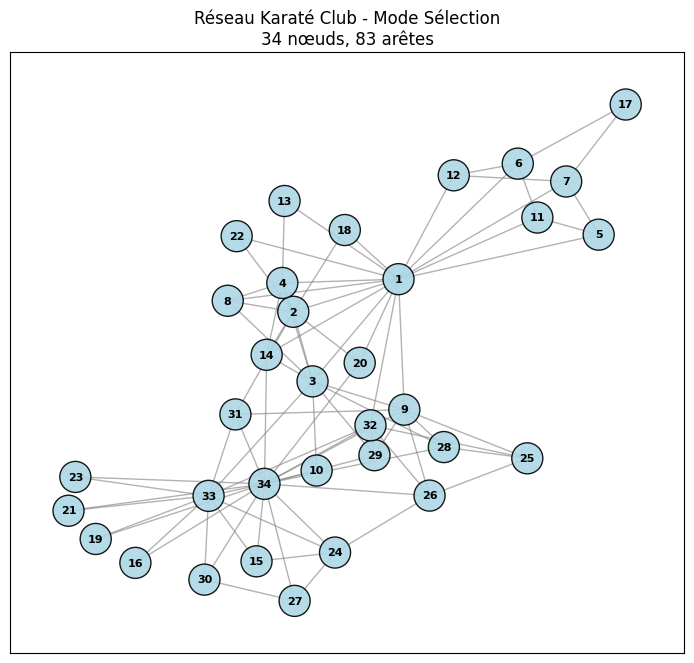

In [8]:
# === INTERFACE INTERACTIVE AVEC TKINTER ===
import tkinter as tk
from tkinter import ttk, messagebox, filedialog
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import networkx as nx
import pandas as pd
import numpy as np

class KarateClubApp:
    def __init__(self, root):
        # Initialisation de la fenêtre principale
        self.root = root
        self.root.title("Analyse du Réseau Karaté Club - Interface Interactive")
        self.root.geometry("1200x800")
        
        # DONNÉES ORIGINALES - NE PAS MODIFIER
        # Arêtes fixes du réseau Karaté Club (étude sociologique célèbre)
        self.original_edges = [
            (1,2),(1,3),(1,4),(1,5),(1,6),(1,7),(1,8),(1,9),(1,11),(1,12),(1,13),(1,14),(1,18),(1,20),(1,22),(1,32),
            (2,3),(2,4),(2,8),(2,14),(2,18),(2,20),(2,22),(2,31),
            (3,4),(3,8),(3,9),(3,10),(3,14),(3,28),(3,29),(3,33),
            (4,8),(4,13),(4,14),
            (5,7),(5,11),
            (6,11),(6,12),(6,17),
            (7,12),(7,17),
            (9,25),(9,26),(9,28),(9,29),(9,31),(9,34),
            (10,34),
            (14,34),
            (15,24),(15,33),(15,34),
            (16,33),(16,34),
            (19,33),(19,34),
            (20,34),
            (21,33),(21,34),
            (23,33),(23,34),
            (24,26),(24,27),(24,33),(24,34),
            (25,26),(25,28),(25,32),
            (26,32),(26,34),
            (27,30),(27,34),
            (28,34),
            (29,32),(29,34),
            (30,33),(30,34),
            (31,33),(31,34),
            (32,33),(32,34),
            (33,34)
        ]
        
        # Création du graphe NetworkX avec les données originales
        self.G = nx.Graph()
        self.G.add_nodes_from(range(1, 35))  # 34 nœuds numérotés de 1 à 34
        self.G.add_edges_from(self.original_edges)  # Arêtes fixes du club de karaté
        
        # Variables d'état pour gérer l'interaction utilisateur
        self.selected_nodes = []  # Liste des nœuds actuellement sélectionnés
        self.mode = "select"      # Mode d'interaction courant
        self.new_node_id = 35     # Prochain ID pour les nouveaux nœuds (si ajout)
        self.analysis_results = {}  # Stocke les résultats des analyses de réseau
        self.pos = nx.spring_layout(self.G, seed=42)  # Position fixe pour cohérence visuelle
        
        # Initialisation de l'interface
        self.create_widgets()
        self.draw_graph()
        
    def create_widgets(self):
        """Crée tous les éléments de l'interface utilisateur"""
        # Frame principal qui contient toute l'interface
        main_frame = ttk.Frame(self.root)
        main_frame.pack(fill=tk.BOTH, expand=True, padx=10, pady=10)
        
        # Frame pour la visualisation du graphe (côté gauche)
        graph_frame = ttk.Frame(main_frame)
        graph_frame.pack(side=tk.LEFT, fill=tk.BOTH, expand=True)
        
        # Configuration de la figure matplotlib pour l'affichage du graphe
        self.fig, self.ax = plt.subplots(figsize=(8, 6))
        self.canvas = FigureCanvasTkAgg(self.fig, graph_frame)
        self.canvas.get_tk_widget().pack(fill=tk.BOTH, expand=True)
        
        # Connexion de l'événement de clic sur le canvas matplotlib
        self.canvas.mpl_connect('button_press_event', self.on_click)
        
        # Frame pour les contrôles (côté droit - panneau latéral)
        control_frame = ttk.Frame(main_frame, width=300)
        control_frame.pack(side=tk.RIGHT, fill=tk.Y, padx=(10, 0))
        control_frame.pack_propagate(False)  # Fixe la largeur du frame
        
        # Titre du panneau de contrôle
        title_label = ttk.Label(control_frame, text="Contrôles du Réseau", 
                               font=('Arial', 12, 'bold'))
        title_label.pack(pady=10)
        
        # Section des modes d'interaction
        mode_frame = ttk.LabelFrame(control_frame, text="Mode d'Interaction", padding=10)
        mode_frame.pack(fill=tk.X, pady=5)
        
        # Boutons pour changer le mode d'interaction
        ttk.Button(mode_frame, text="Sélectionner", 
                  command=self.set_select_mode).pack(fill=tk.X, pady=2)
        ttk.Button(mode_frame, text="Ajouter Arête", 
                  command=self.set_add_edge_mode).pack(fill=tk.X, pady=2)
        ttk.Button(mode_frame, text="Ajouter Nœud", 
                  command=self.set_add_node_mode).pack(fill=tk.X, pady=2)
        ttk.Button(mode_frame, text="Supprimer", 
                  command=self.set_delete_mode).pack(fill=tk.X, pady=2)
        
        # Section des actions globales
        action_frame = ttk.LabelFrame(control_frame, text="Actions", padding=10)
        action_frame.pack(fill=tk.X, pady=5)
        
        # Boutons pour les opérations sur le graphe entier
        ttk.Button(action_frame, text="Analyser le Réseau", 
                  command=self.analyze_graph).pack(fill=tk.X, pady=2)
        ttk.Button(action_frame, text="Exporter Résultats", 
                  command=self.export_results).pack(fill=tk.X, pady=2)
        ttk.Button(action_frame, text="Réinitialiser", 
                  command=self.reset_graph).pack(fill=tk.X, pady=2)
        
        # Section d'affichage des informations
        info_frame = ttk.LabelFrame(control_frame, text="Informations", padding=10)
        info_frame.pack(fill=tk.BOTH, expand=True, pady=5)
        
        # Zone de texte avec barre de défilement pour les informations détaillées
        self.info_text = tk.Text(info_frame, height=15, width=35, font=('Courier', 9))
        scrollbar = ttk.Scrollbar(info_frame, orient=tk.VERTICAL, command=self.info_text.yview)
        self.info_text.configure(yscrollcommand=scrollbar.set)
        self.info_text.pack(side=tk.LEFT, fill=tk.BOTH, expand=True)
        scrollbar.pack(side=tk.RIGHT, fill=tk.Y)
        
        # Barre de statut en bas de l'interface
        self.status_var = tk.StringVar(value="Mode: Sélection - Cliquez sur un nœud")
        status_label = ttk.Label(control_frame, textvariable=self.status_var, 
                                foreground='blue', font=('Arial', 9))
        status_label.pack(pady=5)
        
        # Affichage initial des informations
        self.update_info()
    
    def set_select_mode(self):
        """Active le mode sélection de nœuds"""
        self.mode = "select"
        self.status_var.set("Mode: Sélection - Cliquez sur un nœud pour le sélectionner")
        self.selected_nodes = []  # Réinitialise la sélection
        self.draw_graph()
    
    def set_add_edge_mode(self):
        """Active le mode ajout d'arêtes entre nœuds"""
        self.mode = "add_edge"
        self.status_var.set("Mode: Ajouter Arête - Sélectionnez 2 nœuds")
        self.selected_nodes = []  # Réinitialise la sélection
        self.draw_graph()
    
    def set_add_node_mode(self):
        """Active le mode ajout de nouveaux nœuds"""
        self.mode = "add_node"
        self.status_var.set("Mode: Ajouter Nœud - Cliquez sur un emplacement vide")
        self.selected_nodes = []  # Réinitialise la sélection
        self.draw_graph()
    
    def set_delete_mode(self):
        """Active le mode suppression d'éléments"""
        self.mode = "delete"
        self.status_var.set("Mode: Suppression - Cliquez sur un nœud ou une arête")
        self.draw_graph()
    
    def on_click(self, event):
        """Gère les événements de clic sur le graphique"""
        # Vérifie que le clic est dans la zone du graphique
        if event.inaxes != self.ax:
            return
        
        # Récupère les coordonnées du clic dans le système du graphique
        click_pos = np.array([event.xdata, event.ydata])
        
        try:
            # Appelle la méthode appropriée selon le mode actuel
            if self.mode == "select":
                self.handle_select_mode(click_pos)
            elif self.mode == "add_edge":
                self.handle_add_edge_mode(click_pos)
            elif self.mode == "add_node":
                self.handle_add_node_mode(click_pos)
            elif self.mode == "delete":
                self.handle_delete_mode(click_pos)
        except Exception as e:
            self.status_var.set(f"Erreur: {str(e)}")
    
    def handle_select_mode(self, click_pos):
        """Gère les clics en mode sélection"""
        closest_node = self.find_closest_node(click_pos)
        if closest_node is not None:
            # Alterne la sélection du nœud (sélection/désélection)
            if closest_node in self.selected_nodes:
                self.selected_nodes.remove(closest_node)
                self.status_var.set(f"Nœud {closest_node} désélectionné")
            else:
                self.selected_nodes.append(closest_node)
                self.status_var.set(f"Nœud {closest_node} sélectionné")
            self.draw_graph()
            self.show_node_info(closest_node)  # Affiche les infos du nœud
    
    def handle_add_edge_mode(self, click_pos):
        """Gère les clics en mode ajout d'arête"""
        closest_node = self.find_closest_node(click_pos)
        if closest_node is not None:
            # Ajoute le nœud à la sélection temporaire
            if closest_node not in self.selected_nodes:
                self.selected_nodes.append(closest_node)
                self.status_var.set(f"Nœud {closest_node} sélectionné. Sélectionnez un deuxième nœud.")
            
            # Quand deux nœuds sont sélectionnés, crée l'arête
            if len(self.selected_nodes) == 2:
                node1, node2 = self.selected_nodes
                if node1 != node2:
                    if not self.G.has_edge(node1, node2):
                        self.G.add_edge(node1, node2)
                        self.status_var.set(f"Arête ajoutée entre {node1} et {node2}")
                    else:
                        self.status_var.set(f"Arête existe déjà entre {node1} et {node2}")
                self.selected_nodes = []  # Réinitialise la sélection
            self.draw_graph()
    
    def handle_add_node_mode(self, click_pos):
        """Gère les clics en mode ajout de nœud"""
        closest_node = self.find_closest_node(click_pos)
        # Vérifie qu'on n'ajoute pas trop près d'un nœud existant
        if closest_node is None or self.calculate_distance(click_pos, self.pos[closest_node]) > 0.1:
            new_node = self.new_node_id
            self.G.add_node(new_node)
            self.pos[new_node] = click_pos  # Positionne le nouveau nœud
            self.new_node_id += 1
            self.status_var.set(f"Nœud {new_node} ajouté")
            self.draw_graph()
        else:
            self.status_var.set("Trop proche d'un nœud existant")
    
    def handle_delete_mode(self, click_pos):
        """Gère les clics en mode suppression"""
        # Essaie d'abord de trouver un nœud à supprimer
        closest_node = self.find_closest_node(click_pos)
        if closest_node is not None:
            self.G.remove_node(closest_node)
            if closest_node in self.selected_nodes:
                self.selected_nodes.remove(closest_node)
            self.status_var.set(f"Nœud {closest_node} supprimé")
            self.draw_graph()
        else:
            # Si pas de nœud, essaie de trouver une arête à supprimer
            closest_edge = self.find_closest_edge(click_pos)
            if closest_edge is not None:
                self.G.remove_edge(*closest_edge)
                self.status_var.set(f"Arête {closest_edge} supprimée")
                self.draw_graph()
    
    def find_closest_node(self, click_pos):
        """Trouve le nœud le plus proche du point de clic"""
        min_dist = float('inf')
        closest_node = None
        
        for node in self.G.nodes():
            pos = self.pos[node]
            dist = np.linalg.norm(click_pos - pos)
            # Seuil de détection de 0.08 unités
            if dist < min_dist and dist < 0.08:
                min_dist = dist
                closest_node = node
        
        return closest_node
    
    def find_closest_edge(self, click_pos):
        """Trouve l'arête la plus proche du point de clic"""
        min_dist = float('inf')
        closest_edge = None
        
        for edge in self.G.edges():
            node1, node2 = edge
            pos1, pos2 = self.pos[node1], self.pos[node2]
            # Calcule la distance du point à la ligne de l'arête
            dist = self.point_to_line_distance(click_pos, pos1, pos2)
            # Seuil de détection de 0.05 unités
            if dist < min_dist and dist < 0.05:
                min_dist = dist
                closest_edge = edge
        
        return closest_edge
    
    def calculate_distance(self, pos1, pos2):
        """Calcule la distance euclidienne entre deux points"""
        return np.linalg.norm(pos1 - pos2)
    
    def point_to_line_distance(self, point, line_start, line_end):
        """Calcule la distance d'un point à un segment de ligne"""
        line_vec = line_end - line_start
        point_vec = point - line_start
        line_len = np.linalg.norm(line_vec)
        
        if line_len == 0:
            return self.calculate_distance(point, line_start)
            
        line_unitvec = line_vec / line_len
        t = np.dot(line_unitvec, point_vec / line_len)
        
        # Limite t au segment [0,1] pour le point le plus proche sur le segment
        if t < 0.0:
            t = 0.0
        elif t > 1.0:
            t = 1.0
        
        nearest = line_start + line_vec * t
        return self.calculate_distance(point, nearest)
    
    def show_node_info(self, node):
        """Affiche les informations détaillées sur un nœud"""
        info_text = f"=== NŒUD {node} ===\n"
        info_text += f"Degré: {self.G.degree(node)}\n"  # Nombre de connexions
        info_text += f"Voisins: {list(self.G.neighbors(node))}\n"  # Liste des connexions
        
        # Ajoute les métriques d'analyse si disponibles
        if node in self.analysis_results:
            analysis = self.analysis_results[node]
            info_text += f"\n--- ANALYSE ---\n"
            info_text += f"Centralité: {analysis.get('centrality', 0):.3f}\n"
            info_text += f"Clustering: {analysis.get('clustering', 0):.3f}\n"
            info_text += f"Intermédiarité: {analysis.get('betweenness', 0):.3f}\n"
        
        self.info_text.delete(1.0, tk.END)
        self.info_text.insert(1.0, info_text)
    
    def analyze_graph(self):
        """Effectue une analyse complète du réseau"""
        try:
            # Calcul des différentes métriques de réseau
            degree_centrality = nx.degree_centrality(self.G)  # Centralité par degré
            clustering = nx.clustering(self.G)  # Coefficient de clustering local
            betweenness = nx.betweenness_centrality(self.G)  # Centralité d'intermédiarité
            
            # Stocke les résultats pour chaque nœud
            self.analysis_results = {}
            for node in self.G.nodes():
                self.analysis_results[node] = {
                    'degree': self.G.degree(node),
                    'centrality': degree_centrality.get(node, 0),
                    'clustering': clustering.get(node, 0),
                    'betweenness': betweenness.get(node, 0)
                }
            
            # Génère un rapport d'analyse complet
            info_text = "=== ANALYSE COMPLÈTE ===\n\n"
            info_text += f"Nœuds: {self.G.number_of_nodes()}\n"
            info_text += f"Arêtes: {self.G.number_of_edges()}\n"
            info_text += f"Densité: {nx.density(self.G):.3f}\n"
            info_text += f"Clustering moyen: {nx.average_clustering(self.G):.3f}\n\n"
            
            info_text += "TOP 5 CENTRALITÉ:\n"
            top_nodes = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
            for node, cent in top_nodes:
                info_text += f"Nœud {node}: {cent:.3f}\n"
            
            self.info_text.delete(1.0, tk.END)
            self.info_text.insert(1.0, info_text)
            
            self.status_var.set("Analyse terminée!")
            self.draw_graph()
            
        except Exception as e:
            messagebox.showerror("Erreur", f"Erreur lors de l'analyse: {str(e)}")
    
    def export_results(self):
        """Exporte les résultats d'analyse et le graphique"""
        try:
            # Dialogue pour choisir l'emplacement de sauvegarde
            filename = filedialog.asksaveasfilename(
                defaultextension=".csv",
                filetypes=[("CSV files", "*.csv"), ("All files", "*.*")]
            )
            
            if filename:
                # Export des données d'analyse en CSV si disponibles
                if self.analysis_results:
                    df = pd.DataFrame.from_dict(self.analysis_results, orient='index')
                    df.index.name = 'Noeud'
                    df.to_csv(filename, encoding='utf-8')
                
                # Export de l'image du graphique
                image_filename = filename.replace('.csv', '.png')
                self.fig.savefig(image_filename, dpi=300, bbox_inches='tight')
                
                self.status_var.set(f"Export réussi: {filename}")
                messagebox.showinfo("Succès", f"Résultats exportés:\n{filename}\n{image_filename}")
                
        except Exception as e:
            messagebox.showerror("Erreur", f"Erreur lors de l'export: {str(e)}")
    
    def reset_graph(self):
        """Réinitialise le graphe à son état original"""
        # RECRÉATION DU GRAPHE ORIGINAL - ÉTAT INITIAL
        self.G = nx.Graph()
        self.G.add_nodes_from(range(1, 35))  # 34 nœuds originaux
        self.G.add_edges_from(self.original_edges)  # Arêtes originales
        
        # Réinitialisation des variables d'état
        self.selected_nodes = []
        self.mode = "select"
        self.new_node_id = 35
        self.pos = nx.spring_layout(self.G, seed=42)  # Même disposition
        
        self.status_var.set("Graphe réinitialisé")
        self.update_info()
        self.draw_graph()
    
    def update_info(self):
        """Met à jour les informations générales affichées"""
        info_text = f"Réseau Karaté Club\n"
        info_text += f"Nœuds: {self.G.number_of_nodes()}\n"
        info_text += f"Arêtes: {self.G.number_of_edges()}\n"
        info_text += f"Densité: {nx.density(self.G):.3f}\n\n"
        info_text += "Sélectionnez un nœud ou utilisez les boutons pour interagir."
        
        self.info_text.delete(1.0, tk.END)
        self.info_text.insert(1.0, info_text)
    
    def draw_graph(self):
        """Dessine le graphe dans la figure matplotlib"""
        self.ax.clear()
        
        # Dessin uniquement si le graphe contient des nœuds
        if self.G.number_of_nodes() > 0:
            # Couleurs et tailles différentes pour les nœuds sélectionnés
            node_colors = ['red' if node in self.selected_nodes else 'lightblue' 
                          for node in self.G.nodes()]
            node_sizes = [800 if node in self.selected_nodes else 500 
                         for node in self.G.nodes()]
            
            # Dessin des éléments du graphe
            nx.draw_networkx_nodes(self.G, self.pos, ax=self.ax,
                                  node_color=node_colors, node_size=node_sizes,
                                  alpha=0.9, edgecolors='black')
            nx.draw_networkx_edges(self.G, self.pos, ax=self.ax,
                                  alpha=0.6, edge_color='gray')
            nx.draw_networkx_labels(self.G, self.pos, ax=self.ax,
                                   font_size=8, font_weight='bold')
        
        # Titre contextuel selon le mode actuel
        mode_titles = {
            "select": "Mode Sélection",
            "add_edge": "Mode Ajout Arête", 
            "add_node": "Mode Ajout Nœud",
            "delete": "Mode Suppression"
        }
        
        title = f"Réseau Karaté Club - {mode_titles.get(self.mode, '')}\n"
        title += f"{self.G.number_of_nodes()} nœuds, {self.G.number_of_edges()} arêtes"
        
        self.ax.set_title(title, fontsize=12)
        self.ax.set_xticks([])
        self.ax.set_yticks([])
        self.ax.axis('on')
        
        self.canvas.draw()  # Actualise l'affichage

# Lancement de l'application
if __name__ == "__main__":
    print("Lancement de l'interface interactive Tkinter...")
    root = tk.Tk()
    app = KarateClubApp(root)
    root.mainloop()  # Boucle principale de Tkinter


=== QUESTION 4: EXPORT DES RÉSULTATS (CORRIGÉ) ===
Calcul des métriques nécessaires...
 Toutes les métriques calculées

--- 4.1 Export CSV ---
 Données exportées dans 'analyse_complete_karate.csv'
 Matrice d'adjacence exportée dans 'matrice_adjacence_karate.csv'

--- 4.3 Export des visualisations (corrigé) ---


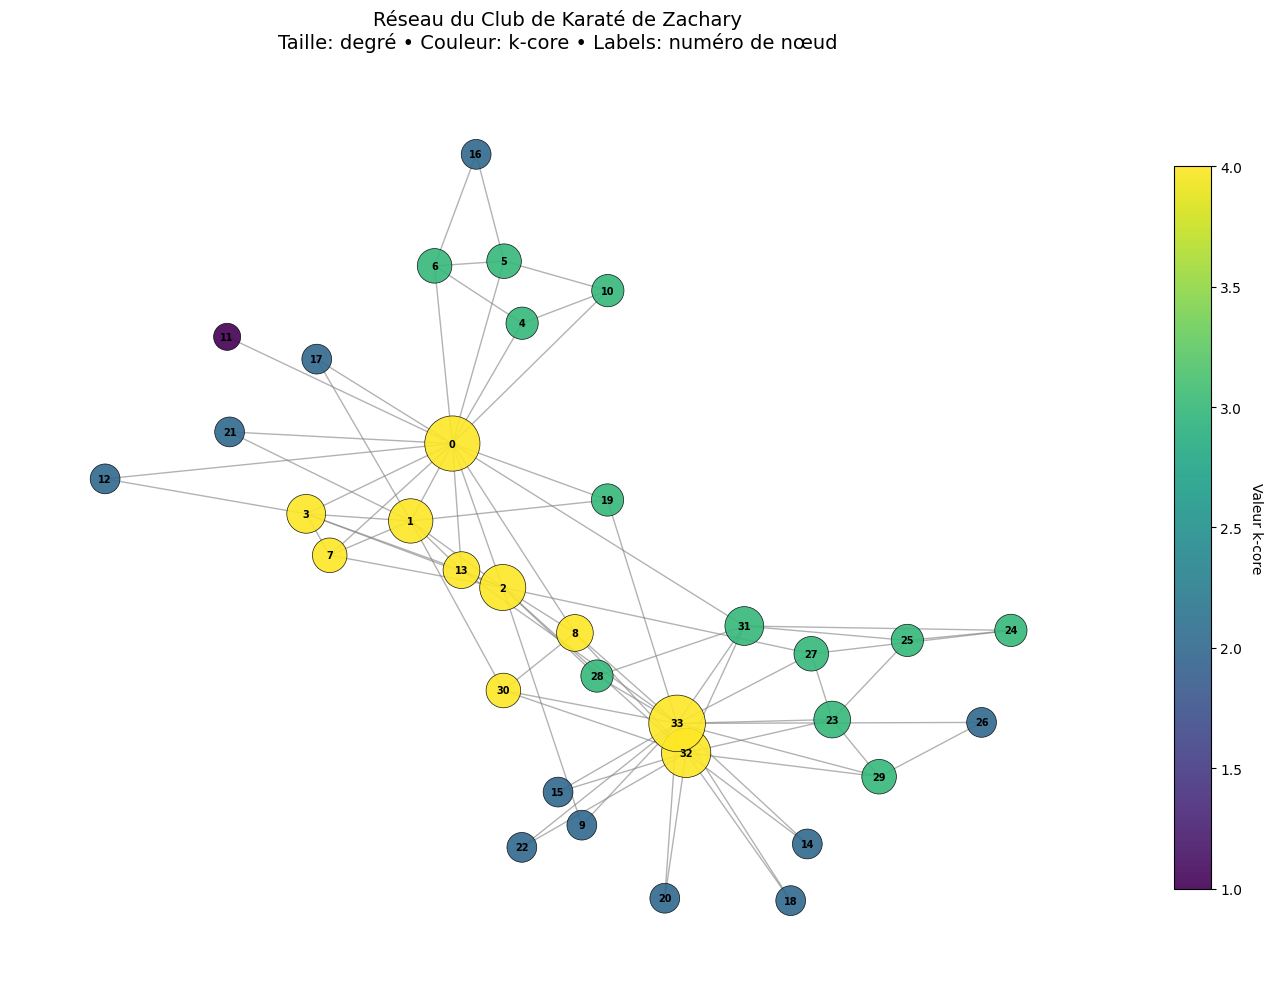

 Visualisation du graphe exportée


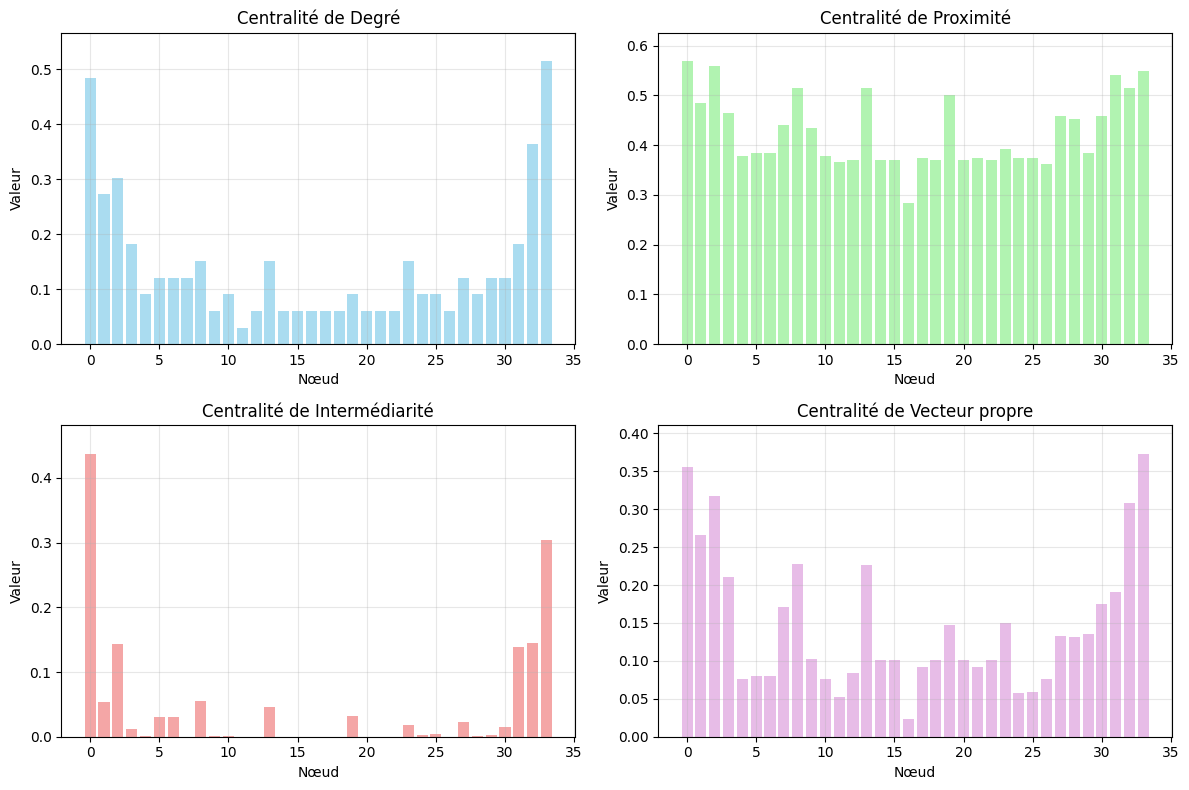

 Graphiques des centralités exportés


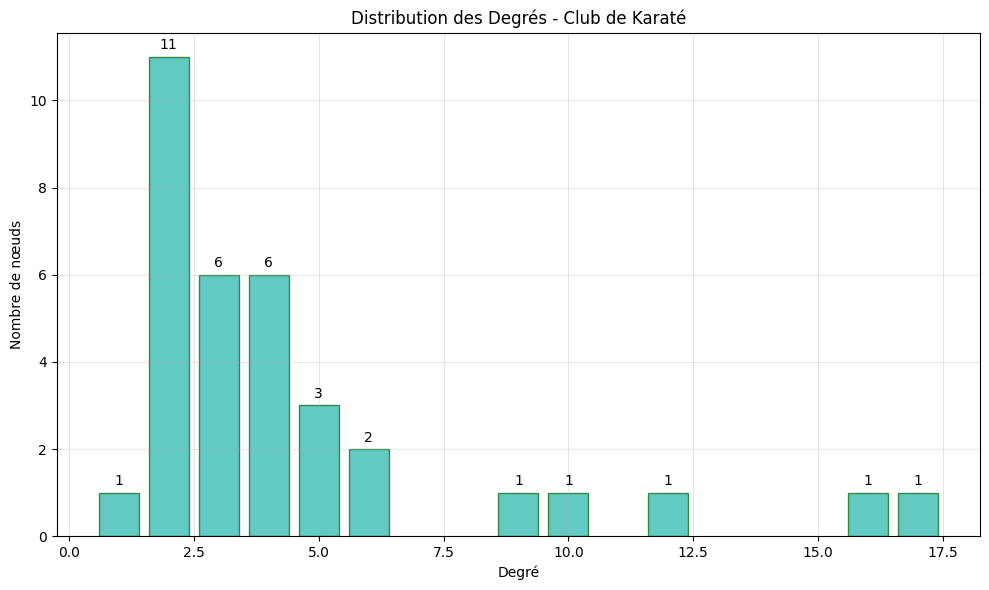

 Distribution des degrés exportée

 Tous les exports ont été réalisés avec succès!


In [10]:
# === QUESTION 4 CORRIGÉE ===
print("\n=== QUESTION 4: EXPORT DES RÉSULTATS (CORRIGÉ) ===")

# Import des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Création ou récupération du graphe Karaté Club
G = nx.karate_club_graph()

# Calcul de toutes les métriques nécessaires pour l'export
print("Calcul des métriques nécessaires...")

# Dictionnaire des degrés
degres = dict(G.degree())

# Clustering local
clustering_local = nx.clustering(G)

# Triangles par nœud
triangles_par_noeud = nx.triangles(G)

# Nombres de core (k-core)
core_numbers = nx.core_number(G)

# Différentes centralités
degree_cent = nx.degree_centrality(G)
closeness_cent = nx.closeness_centrality(G)
betweenness_cent = nx.betweenness_centrality(G)
eigenvector_cent = nx.eigenvector_centrality(G, max_iter=1000)

# Matrice d'adjacence
adj_array = nx.to_numpy_array(G, dtype=int)

print(" Toutes les métriques calculées")

# 4.1 Export CSV des analyses
print("\n--- 4.1 Export CSV ---")

# Préparation des données
data_export = []
for node in range(1, 35):
    data_export.append({
        'Noeud': node,
        'Degre': degres.get(node, 0),
        'Clustering': clustering_local.get(node, 0),
        'Triangles': triangles_par_noeud.get(node, 0),
        'kCore': core_numbers.get(node, 0),
        'Centralite_Degre': degree_cent.get(node, 0),
        'Centralite_Proximite': closeness_cent.get(node, 0),
        'Centralite_Intermediarite': betweenness_cent.get(node, 0),
        'Centralite_Vecteur_Propre': eigenvector_cent.get(node, 0)
    })

df_export = pd.DataFrame(data_export)
df_export.to_csv('analyse_complete_karate.csv', index=False, encoding='utf-8')
print(" Données exportées dans 'analyse_complete_karate.csv'")

# 4.2 Export de la matrice d'adjacence
np.savetxt('matrice_adjacence_karate.csv', adj_array, delimiter=',', fmt='%d')
print(" Matrice d'adjacence exportée dans 'matrice_adjacence_karate.csv'")

# 4.3 Export des visualisations (CORRIGÉ)
print("\n--- 4.3 Export des visualisations (corrigé) ---")

# Graphique principal avec colorbar corrigée
plt.figure(figsize=(14, 10))
node_colors = [core_numbers[node] for node in G.nodes()]
node_sizes = [300 + degres[node] * 80 for node in G.nodes()]

# Création du graphique avec gestion correcte de la colorbar
pos = nx.spring_layout(G, seed=42)  # Assurer que 'pos' est défini

# Dessiner le graphe
nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, 
                              node_color=node_colors, cmap=plt.cm.viridis, 
                              alpha=0.9, edgecolors='black', linewidths=0.5)
nx.draw_networkx_edges(G, pos, alpha=0.6, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=7, font_weight='bold')

plt.title("Réseau du Club de Karaté de Zachary\n" +
          "Taille: degré • Couleur: k-core • Labels: numéro de nœud", 
          fontsize=14, pad=20)
plt.axis('off')

# Colorbar corrigée
if nodes is not None:
    cbar = plt.colorbar(nodes, shrink=0.8)
    cbar.set_label('Valeur k-core', rotation=270, labelpad=15)
else:
    # Solution alternative si nodes est None
    import matplotlib.cm as cm
    from matplotlib.colors import Normalize
    norm = Normalize(vmin=min(node_colors), vmax=max(node_colors))
    sm = cm.ScalarMappable(norm=norm, cmap=plt.cm.viridis)
    sm.set_array([])
    cbar = plt.colorbar(sm, shrink=0.8)
    cbar.set_label('Valeur k-core', rotation=270, labelpad=15)

plt.tight_layout()
plt.savefig('reseau_karate_complet.png', dpi=300, bbox_inches='tight')
plt.savefig('reseau_karate_complet.pdf', bbox_inches='tight')
plt.show()
print(" Visualisation du graphe exportée")

# Graphique des centralités (version corrigée et simplifiée)
plt.figure(figsize=(12, 8))
centralites_types = ['Degré', 'Proximité', 'Intermédiarité', 'Vecteur propre']
centralites_data = [degree_cent, closeness_cent, betweenness_cent, eigenvector_cent]
colors = ['skyblue', 'lightgreen', 'lightcoral', 'plum']

for i, (nom, data, color) in enumerate(zip(centralites_types, centralites_data, colors)):
    plt.subplot(2, 2, i+1)
    nodes_sorted = sorted(data.keys())
    values = [data[node] for node in nodes_sorted]
    plt.bar(nodes_sorted, values, color=color, alpha=0.7)
    plt.title(f'Centralité de {nom}')
    plt.xlabel('Nœud')
    plt.ylabel('Valeur')
    plt.grid(True, alpha=0.3)
    # Ajuster l'échelle y pour mieux voir les différences
    plt.ylim(0, max(values) * 1.1)

plt.tight_layout()
plt.savefig('centralites_karate.png', dpi=300, bbox_inches='tight')
plt.show()
print(" Graphiques des centralités exportés")

# Distribution des degrés (version améliorée)
plt.figure(figsize=(10, 6))
degree_dist = pd.Series(list(degres.values()))
degree_counts = degree_dist.value_counts().sort_index()

plt.bar(degree_counts.index, degree_counts.values, 
        color='lightseagreen', alpha=0.7, edgecolor='darkgreen')
plt.xlabel('Degré')
plt.ylabel('Nombre de nœuds')
plt.title('Distribution des Degrés - Club de Karaté')
plt.grid(True, alpha=0.3)

# Ajouter les valeurs sur les barres
for deg, count in degree_counts.items():
    plt.text(deg, count + 0.1, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.savefig('distribution_degres_ameliorée.png', dpi=300, bbox_inches='tight')
plt.show()
print(" Distribution des degrés exportée")

print("\n Tous les exports ont été réalisés avec succès!")